In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, precision_score, recall_score,
                             f1_score)
from sklearn.utils import resample
import pickle

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
news_df=pd.read_csv('/content/drive/MyDrive/nlp/all_feed_all_docs_sentiment.csv')

In [ ]:
news_df['sentiment_class'] = np.where(news_df['vader_sentiment'] > 0.5, 1, np.where(news_df['vader_sentiment'] < -0.5, -1, 0))  # Create a new column 'sentiment_class' based on the condition

In [ ]:
news_df.head()

,names,clubs,fee,token,textblob_sentiment,vader_sentiment,sentiment_class
0,"Alisson, Alisson, Ederson, Arijanet Muric - Bu...","Premier League, Ederson and AlissonLiverpool, ...","20m/£17.3, 20m/£17.3, 20, 50m/£43.4, 43.8, 60m...",top ten valuable Premier League goalkeeper rev...,0.155333,0.9988,1
1,"Marcus Rashford, Rashford, HTML5, Maintenance,...","Manchester United, Sun, United, Rolls-Royce, U...","700,000",England striker involved crash grandmother yes...,0.102632,0.5764,1
2,"Main NavigationSkip, Erik, Roy Hodgson, Erik, ...","United, United, BST, Sky Sports, Newcastle Uni...",NaN,Skip Main NavigationSkip contentHow follow Uni...,0.116188,0.9975,1
3,"Erik, Nerazzurri, David De Gea, Man Utd, Jan O...","Manchester United, LaLiga, Old Trafford, Inter...","43.8, 47.8, 50, 50, 43.6",Manchester United reportedly weighing January ...,0.088997,0.9936,1
4,"Mateo Kovacic, Kovacic, Kovacic, Mateo Kovacic...","City, Red Star Belgrade, the Champions League,...",£30 million,Pep Guardiola gave injury update Manchester Ci...,0.144121,0.9582,1


In [ ]:
news_df['sentiment_class'].value_counts()

,count
sentiment_class,
1,189203
-1,12192
0,11458


In [ ]:
news_df['sentiment_label'] = news_df['sentiment_class'].apply(lambda x: 'positive' if x == 1 else ('negative' if x == -1 else 'neutral'))

In [ ]:
news_df['sentiment_label'].value_counts()

,count
sentiment_label,
positive,189203
negative,12192
neutral,11458


In [ ]:
positive_df = news_df[news_df['sentiment_label'] == 'positive']
negative_df = news_df[news_df['sentiment_label'] == 'negative']
neutral_df = news_df[news_df['sentiment_label'] == 'neutral']

In [ ]:
positive_df_downsampled = resample(positive_df, replace=False, n_samples=len(negative_df), random_state=42)

In [ ]:
news_df_balanced = pd.concat([positive_df_downsampled, negative_df, neutral_df])

In [ ]:
news_df_balanced['sentiment_label'].value_counts()

,count
sentiment_label,
positive,12192
negative,12192
neutral,11458


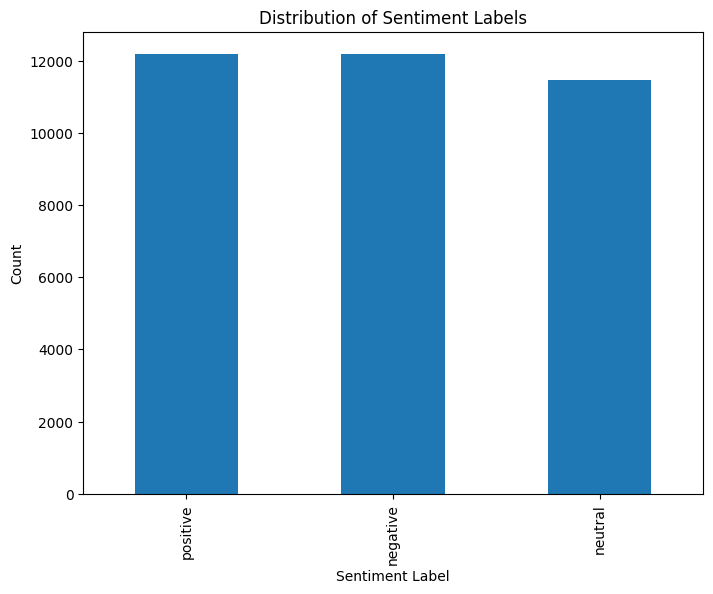

In [ ]:
plt.figure(figsize=(8, 6))
news_df_balanced['sentiment_label'].value_counts().plot(kind='bar')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.show()

In [ ]:
news_df_balanced.to_csv('/content/drive/MyDrive/nlp/news_df_balanced.csv', index=False)

In [ ]:
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [ ]:
with open('/content/drive/MyDrive/nlp/src/dumps/cv.pkl', 'wb') as f:
    pickle.dump(cv, f)